In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [35]:
df = pd.read_csv('ecgdata.csv')
print(df)

            time       ecg
0        729.500  0.546875
1        729.501  0.553125
2        729.502  0.540625
3        729.503  0.537500
4        729.504  0.553125
...          ...       ...
309995  1039.495  0.006250
309996  1039.496  0.009375
309997  1039.497  0.018750
309998  1039.498  0.003125
309999  1039.499 -0.028125

[310000 rows x 2 columns]


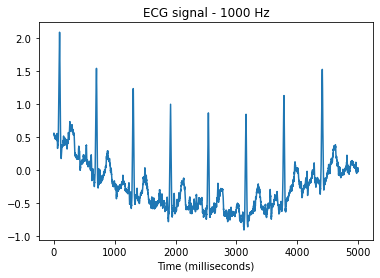

In [36]:
plt.title("ECG signal - 1000 Hz")
plt.plot(df.ecg[0:5000])
plt.xlabel('Time (milliseconds)')
plt.show()

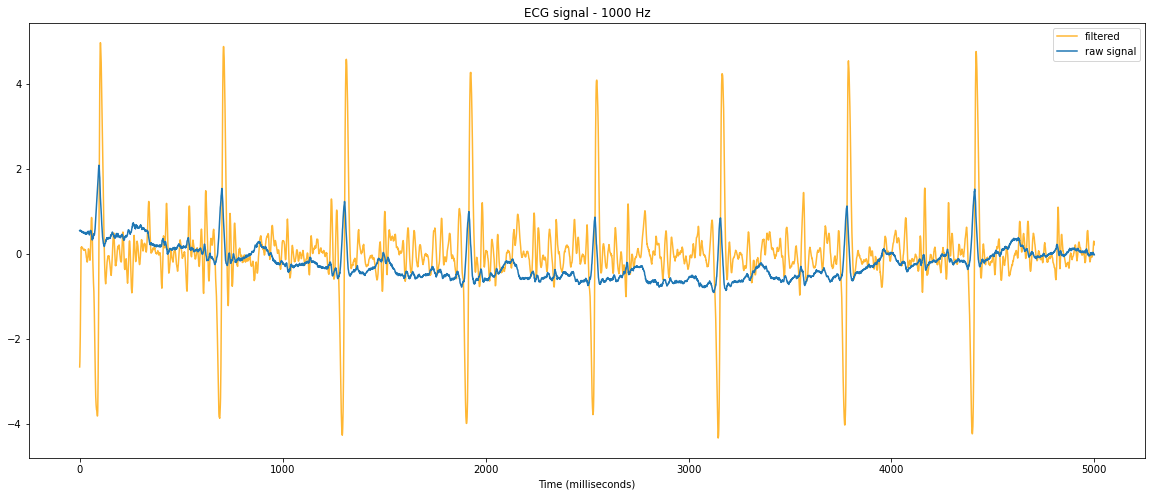

In [37]:
# linear spaced vector between 0.5 pi and 1.5 pi 
v = np.linspace(0.5 * np.pi, 1.5 * np.pi, 15)

# create sine filter for approximating QRS feature
peak_filter = np.sin(v)

# compute cross correlation between ecg and the sine filter
ecg_transformed = np.correlate(df.ecg, peak_filter, mode="same")

# and plot the raw + filtered signal
plt.figure(figsize=(20,8))
plt.title('ECG signal - 1000 Hz')
plt.plot(ecg_transformed[0:5000], alpha = 0.8, c='orange')
plt.plot(df.ecg[0:5000], alpha = 1)
plt.gca().legend(('filtered','raw signal'))
plt.xlabel('Time (milliseconds)')
plt.show()

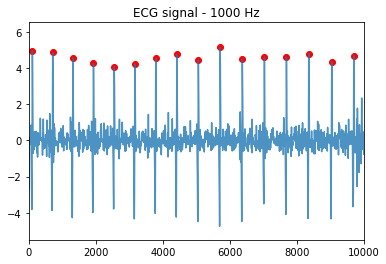

In [38]:
diff_sig_ecg = np.diff(df['ecg'])
rr_peaks, _ = find_peaks(ecg_transformed, distance=1000*(30/60))
plt.plot(ecg_transformed, alpha = 0.8)
plt.scatter(rr_peaks, ecg_transformed[rr_peaks], color='red')
plt.xlim(0,10000)
plt.title("ECG signal - 1000 Hz")
plt.show()

In [45]:
rr_ecg = np.diff(rr_peaks)

In [51]:
heart_rate=60000/np.mean(rr_ecg)

In [52]:
heart_rate

91.7887181208487